# Práctica 8:  Máquinas de Vectores Soporte
- Grupo 1:
    - Jesús María Matos Torres.
    - Carlos Santana Esplá.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Ejercicio 1: Máquina de vectores soporte lineal.

In [10]:
df=pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Práctica 8/datos_svm.csv')

x = df.iloc[:,:2]
y = df.iloc[:,2]

clf0 = SVC(C=0.01, kernel='linear')
clf1 = SVC(C=1.0, kernel='linear')
clf10 = SVC(C=10.0, kernel='linear')

clf0.fit(x,y)
clf1.fit(x,y)
clf10.fit(x,y)

x = x.to_numpy()

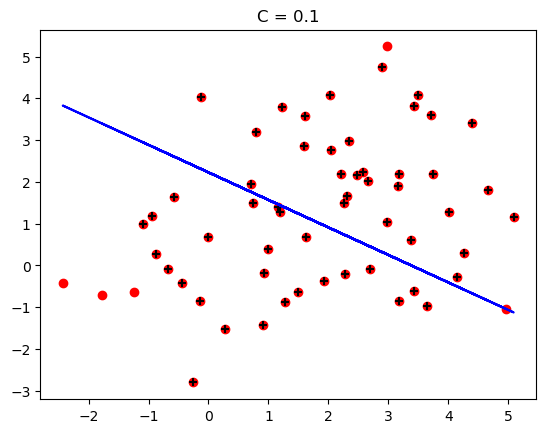

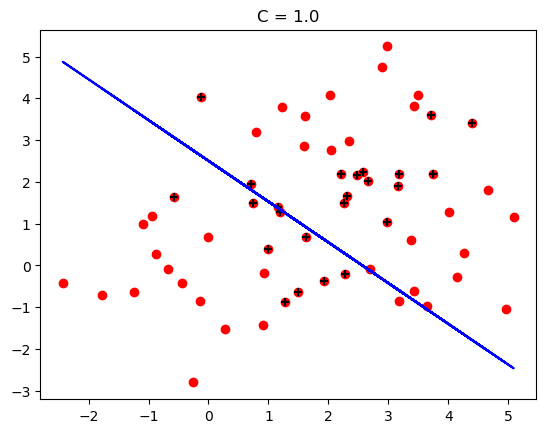

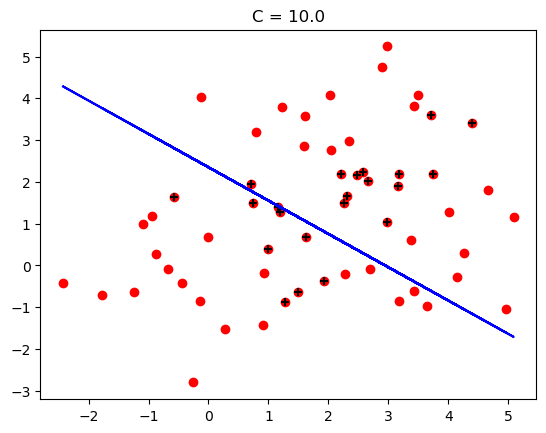

In [19]:
ax = plt.subplot()
coor_y = (-(clf0.coef_[0][0]/clf0.coef_[0][1])*x[:,0]) - (clf0.intercept_[0]/clf0.coef_[0][1])
ax.plot(x[:,0], coor_y, color='blue');
ax.set_title('C = 0.1')
ax.scatter(x[:,0], x[:,1], color='red')
ax.scatter(clf0.support_vectors_[:,0], clf0.support_vectors_[:,1], marker = '+', color='black')
plt.show()

ax1 = plt.subplot()
coor_y1 = (-(clf1.coef_[0][0]/clf1.coef_[0][1])*x[:,0]) - (clf1.intercept_[0]/clf1.coef_[0][1])
ax1.plot(x[:,0], coor_y1, color='blue')
ax1.set_title('C = 1.0')
ax1.scatter(x[:,0], x[:,1], color='red')
ax1.scatter(clf1.support_vectors_[:,0], clf1.support_vectors_[:,1], marker = '+', color='black')
plt.show()

ax2 = plt.subplot()
coor_y2 = (-(clf10.coef_[0][0]/clf10.coef_[0][1])*x[:,0]) - (clf10.intercept_[0]/clf10.coef_[0][1])
ax2.plot(x[:,0], coor_y2, color='blue')
ax2.set_title('C = 10.0')
ax2.scatter(x[:,0], x[:,1], color='red')
ax2.scatter(clf10.support_vectors_[:,0], clf10.support_vectors_[:,1], marker = '+', color='black')
plt.show()

- Como se pueden ver la gráfica donde los vectores soporte tienen una dispersión menor y están más cercanos a la frontera de decisión, es la gráfica con C=1. También, en la gráfica con C=10.0, vemos que es muy sensible a valores atípicos (outliers). Por último, la dispersión de los vectores soportes en la primera gráfica (C=0.1), dista mucho a la frontera de decisión definida, por lo tanto, podemos afirmar que no es el mejor método para este ejemplo.

## Ejercicio 2: Implementar un clasificador de sexo basado en la imagen de la cara con SVM

In [25]:
df_train = pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Practica 5/CelebA-10K/CelebA-10K-train.csv', sep=',')
df_test = pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Practica 5/CelebA-10K/CelebA-10K-test.csv', sep=',')

x_train = df_train.iloc[:,2:]
y_train = df_train.iloc[:,1]
x_test = df_test.iloc[:,2:]
y_test = df_test.iloc[:,1]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, train_size=0.8)

c = [0.01,1.0,5.5,10.0]

val_lin = 0
c1 = 0
for i in  range(len(c)):
    clf = SVC(C=c[i], kernel='linear')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_val)
    print('Coeficiente de regularización', c[i], 'tasa de acierto', accuracy_score(y_pred, y_val), 'kernel=linear')
    if val_lin < accuracy_score(y_pred, y_val):
        c1 = c[i]

val_pol = 0
c2 = 0    
for i in  range(len(c)):
    clf = SVC(C=c[i], kernel='poly')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_val)
    print('Coeficiente de regularización', c[i], 'tasa de acierto', accuracy_score(y_pred, y_val), 'kernel=poly')
    if val_pol < accuracy_score(y_pred, y_val):
        c2 = c[i]

val_rbf = 0
c3= 0    
for i in  range(len(c)):
    clf = SVC(C=c[i], kernel='rbf')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_val)
    print('Coeficiente de regularización', c[i], 'tasa de acierto', accuracy_score(y_pred, y_val), 'kernel=rbf')
    if val_rbf < accuracy_score(y_pred, y_val):
        c3 = c[i]

Coeficiente de regularización 0.01 tasa de acierto 0.91 kernel=linear
Coeficiente de regularización 1.0 tasa de acierto 0.912 kernel=linear
Coeficiente de regularización 5.5 tasa de acierto 0.926 kernel=linear
Coeficiente de regularización 10.0 tasa de acierto 0.931 kernel=linear
Coeficiente de regularización 0.01 tasa de acierto 0.586 kernel=poly
Coeficiente de regularización 1.0 tasa de acierto 0.858 kernel=poly
Coeficiente de regularización 5.5 tasa de acierto 0.934 kernel=poly
Coeficiente de regularización 10.0 tasa de acierto 0.942 kernel=poly
Coeficiente de regularización 0.01 tasa de acierto 0.584 kernel=rbf
Coeficiente de regularización 1.0 tasa de acierto 0.948 kernel=rbf
Coeficiente de regularización 5.5 tasa de acierto 0.957 kernel=rbf
Coeficiente de regularización 10.0 tasa de acierto 0.952 kernel=rbf


- Una vez calculada la tasa de acierto con los distintos coeficientes de regularización seleccionados (0.01,1.0,5.5,10.0), guardamos el coeficiente de regularización con mejor tasa de acierto para cada kernel (linear, poly, rbf) y pasamos al siguiente apartado.

In [27]:
clf = SVC(C=c1, kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('La tasa de acierto para el coeficiente de regularización', c1, 'con el kernel linear es', accuracy_score(y_pred, y_test))

clf = SVC(C=c2, kernel='poly')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('La tasa de acierto para el coeficiente de regularización', c2, 'con el kernel poly es', accuracy_score(y_pred, y_test))


clf = SVC(C=c3, kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('La tasa de acierto para el coeficiente de regularización', c3, 'con el kernel rbf es', accuracy_score(y_pred, y_test))

La tasa de acierto para el coeficiente de regularización 10.0 con el kernel linear es 0.9308
La tasa de acierto para el coeficiente de regularización 10.0 con el kernel poly es 0.9436
La tasa de acierto para el coeficiente de regularización 10.0 con el kernel rbf es 0.9504


- Para este apartado, usamos el conjunto de test, para probar la tasa de acierto del mejor coeficiente de regularización de cada kernel, hallado en el apartado anterior. Como podemos observar, las tasas de acierto son próximas cada vez que ejecutamos el programa, no obstante, como norma general, la tasa de acierto para el coeficiente de regularización 10.0 con el kernel rbf es el mejor.